In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input,Dense,Flatten,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout, Conv1D,Lambda
from keras.models import Model
import pandas as pd
import keras.backend as K
import h5py
import model_architectures as ma
import utils

Using TensorFlow backend.


In [2]:
models_dir = 'C:/Users/91912/projects/models/baseline_cnn/'
feat_file='C:/Users/91912/project_features/base_scrnn_features.h5'
fid=h5py.File(feat_file,'r');
x_tr=fid['x_tr']
y_tr=fid['y_tr'] 
snr_tr = np.array(fid['snr_tr'])
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [3]:
m1 = ma.baseline_conv()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 2)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 2)            8         
_________________________________________________________________
lambda_1 (Lambda)            (None, 128, 2, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 2, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 1, 80)        122960    
_________________________________________________________________
flatten_1 (Flatten)          (None, 9920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2539

In [4]:
checkpoint = keras.callbacks.ModelCheckpoint(models_dir+ "model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [6]:
history = m1.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=128,
       epochs=25,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=2)

Train on 198000 samples, validate on 22000 samples
Epoch 1/25
 - 36s - loss: 1.3752 - accuracy: 0.4708 - val_loss: 1.2683 - val_accuracy: 0.5133

Epoch 00001: saving model to C:/Users/91912/projects/models/baseline_cnn/model_epoch-01_val_acc-0.51.h5
Epoch 2/25
 - 36s - loss: 1.3282 - accuracy: 0.4883 - val_loss: 1.2668 - val_accuracy: 0.5191

Epoch 00002: saving model to C:/Users/91912/projects/models/baseline_cnn/model_epoch-02_val_acc-0.52.h5
Epoch 3/25
 - 37s - loss: 1.2928 - accuracy: 0.5002 - val_loss: 1.2355 - val_accuracy: 0.5295

Epoch 00003: saving model to C:/Users/91912/projects/models/baseline_cnn/model_epoch-03_val_acc-0.53.h5
Epoch 4/25
 - 37s - loss: 1.2607 - accuracy: 0.5103 - val_loss: 1.2388 - val_accuracy: 0.5320

Epoch 00004: saving model to C:/Users/91912/projects/models/baseline_cnn/model_epoch-04_val_acc-0.53.h5
Epoch 5/25
 - 40s - loss: 1.2301 - accuracy: 0.5211 - val_loss: 1.2357 - val_accuracy: 0.5271

Epoch 00005: saving model to C:/Users/91912/projects/model

Baseline cnn


acc_baseline_cnn
 [0.47079292, 0.48831314, 0.50021213, 0.51033336, 0.52110606, 0.53061616, 0.5424596, 0.54943436, 0.5587576, 0.5664545, 0.57387877, 0.5820101, 0.5886414, 0.5957172, 0.60085356, 0.6081263, 0.6140909, 0.6185909, 0.62443435, 0.6308838, 0.63416666, 0.6384596, 0.6409596, 0.64725757, 0.64931816]
val_acc_baseline_cnn
 [0.5132727026939392, 0.519136369228363, 0.5295454263687134, 0.5319545269012451, 0.5271363854408264, 0.5390454530715942, 0.5309090614318848, 0.5340909361839294, 0.5312272906303406, 0.5256817936897278, 0.5258181691169739, 0.5320454835891724, 0.5321363806724548, 0.5283181667327881, 0.5269091129302979, 0.5230454802513123, 0.5236818194389343, 0.5284545421600342, 0.5251363515853882, 0.5197272896766663, 0.5227727293968201, 0.5099999904632568, 0.5136363506317139, 0.5129545331001282, 0.5191818475723267]
loss_baseline_cnn
 [0.47079292, 0.48831314, 0.50021213, 0.51033336, 0.52110606, 0.53061616, 0.5424596, 0.54943436, 0.5587576, 0.5664545, 0.57387877, 0.58201

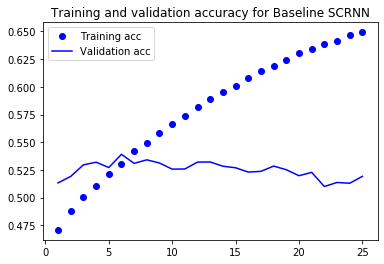

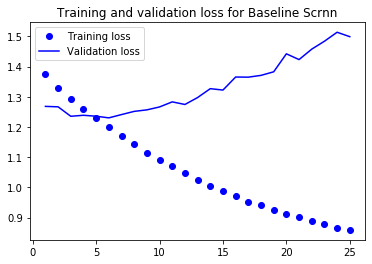

In [7]:
acc_baseline_cnn = history.history['accuracy']
val_acc_baseline_cnn = history.history['val_accuracy']
loss_baseline_cnn = history.history['loss']
val_loss_baseline_cnn = history.history['val_loss']
epochs = range(1, len(acc_baseline_cnn) + 1)

print('===================================================')
print('Baseline cnn\n\n')
print('acc_baseline_cnn\n',acc_baseline_cnn)
print('val_acc_baseline_cnn\n',val_acc_baseline_cnn)
print('loss_baseline_cnn\n',loss_baseline_cnn)
print('val_loss_baseline_cnn\n',val_loss_baseline_cnn)

plt.plot(epochs, acc_baseline_cnn, 'bo', label='Training acc')
plt.plot(epochs, val_acc_baseline_cnn, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Baseline SCRNN')
plt.legend()
plt.figure()
plt.plot(epochs, loss_baseline_cnn, 'bo', label='Training loss')
plt.plot(epochs, val_loss_baseline_cnn, 'b', label='Validation loss')
plt.title('Training and validation loss for Baseline Scrnn')
plt.legend()
plt.show()